# Movies, Movies, Movies!

The data obtained in this project will comes directly from https://www.kaggle.com/code/rafburzy/movies-dataset-analysis/data.
Movie data ranging from 1980-2016 that was scraped from IMDB.com and complied into a csv file.

### Table of Contents

**-Hypothesis** What was the most popular Genre of movie for the 90s? (1990-1999)<br>
**-Data** <br>
**-Visualizations** <br> 

In [70]:
import os

#Get current working directory
cwd = os.getcwd()

#Construct a path to the zip file in the subdirectory 'data'
file_path = os.path.join(cwd, 'data', 'movies.csv.zip')



## The dataset below serves as a sample set of what was explored

In [71]:
import zipfile
import pandas as pd

# Open the zip file and extract the CSV file
with zipfile.ZipFile(file_path, 'r') as zip_file:
    zip_file.extractall()

# Read the CSV file into a pandas DataFrame
movies_df = pd.read_csv('./data/movies.csv')

# Display the first few rows of the DataFrame
print(movies_df.head())

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nic

In [72]:
#This list provides a list for what will be referenced within the code to extract 
#the necessary data to answer the question.
movies_df = pd.read_csv(file_path)
movies_df.columns
movies_df.shape
movies_df.info()
movies_df.isnull().sum().sort_values(ascending=False)
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Here is where the data 'cleaning' process begins

In [73]:
#Dropping all of the unnecessary columns in the original dataset
movies_df.drop(['rating', 'released', 'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime'], axis=1, inplace=True )

#Here I am removing any items with null values from the columns so that the data isnt't skewed
movies_df.dropna(subset=['name', 'genre', 'year', 'score', 'votes', 'director'], inplace=True)
#Sorting the dataframe by year in Ascending order
movies_df.sort_values(['year'], ascending=[True], inplace = True) 
movies_df 

,name,genre,year,score,votes,director
0,The Shining,Drama,1980,8.4,927000.0,Stanley Kubrick
66,Moscow Does Not Believe in Tears,Comedy,1980,8.1,12000.0,Vladimir Menshov
65,Fatso,Comedy,1980,6.3,2000.0,Anne Bancroft
64,Resurrection,Drama,1980,7.3,2800.0,Daniel Petrie
63,Honeysuckle Rose,Drama,1980,6.3,1400.0,Jerry Schatzberg
...,...,...,...,...,...,...
7644,Wonder Woman 1984,Action,2020,5.4,217000.0,Patty Jenkins
7643,Tenet,Action,2020,7.4,387000.0,Christopher Nolan
7665,Saving Mbango,Drama,2020,5.7,29.0,Nkanya Nkwai
7652,The Eight Hundred,Action,2020,6.8,3700.0,Hu Guan


## Now that we have a nice, complete dataset to look at, we'll move on to analyzing the data.

In [74]:
# Here we are slicing the data to only include films that premiered in the 90s and sorting them by year in ascending order and by rating in descending order
#In doing so, we can see that the highest rated film of the 90s decade was "Goodfellas". This might give us a good indication of the most popular Genre,
#but it is too soon to tell
movies_df.loc[(movies_df['year'] >= 1990) & (movies_df['year'] <= 1999)].sort_values(['year', 'score'], ascending=[True, False])


,name,genre,year,score,votes,director
1643,Goodfellas,Biography,1990,8.7,1100000.0,Martin Scorsese
1724,Close-Up,Biography,1990,8.3,17000.0,Abbas Kiarostami
1649,Dances with Wolves,Adventure,1990,8.0,247000.0,Kevin Costner
1656,Edward Scissorhands,Drama,1990,7.9,456000.0,Tim Burton
1652,Misery,Drama,1990,7.8,191000.0,Rob Reiner
...,...,...,...,...,...,...
3554,Universal Soldier: the Return,Action,1999,4.2,28000.0,Mic Rodgers
3528,Inspector Gadget,Action,1999,4.2,46000.0,David Kellogg
3584,Dudley Do-Right,Comedy,1999,3.9,10000.0,Hugh Wilson
3594,Bats,Horror,1999,3.9,9900.0,Louis Morneau


In [75]:
# Create a genre column and score column that combines all scores to get the mean value for each Genre
genre_mean_rating = movies_df.groupby('genre')['score'].mean()
genre_mean_rating_df = genre_mean_rating.to_frame().reset_index()
genre_mean_rating_df.columns = ['genre', 'rating']
movies_df.sort_values(['score'], ascending=[True], inplace = True) 
genre_mean_rating_df

,genre,rating
0,Action,6.202817
1,Adventure,6.291569
2,Animation,6.769231
3,Biography,7.030926
4,Comedy,6.193987
5,Crime,6.671506
6,Drama,6.693668
7,Family,6.363636
8,Fantasy,6.006818
9,History,8.300000


<Axes: title={'center': '90s Movies'}, xlabel='Genre', ylabel='IMDB rating out of 10'>

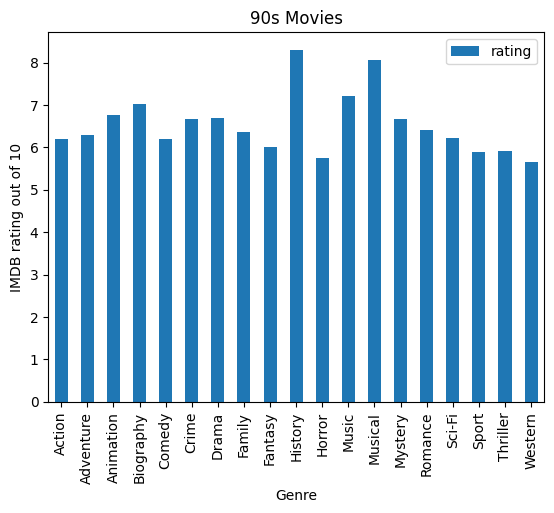

In [76]:
import matplotlib
genre_mean_rating_df.plot(kind="bar", title="90s Movies", ylabel="IMDB rating out of 10", xlabel="Genre", x='genre', y='rating')



In [77]:
#What specific data do we need to explore in order to find the most popular Genre of the 90s.
#Year range = 1990-1999, Rating (scale out of 10), Genre